In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

#### Загрузка данных
Файл содержит информацию о количестве каждой части речи в тексте(название столбцов — части речи, первый столбец — индексы текстов).

In [33]:
df = pd.read_excel('~/PycharmProjects/Diplom/старые/obchij_celij.xls', index_col=0)

#### Данные предварительной обработки

In [34]:
df.columns

Index(['Cуществительное', 'Прилагательное', 'Числительное', 'Местоимение ',
       'Глагол', 'Причастие', 'Деепричастие', 'Наречие', 'Категория состояния',
       'Частица', 'Предлог', 'Союз', 'Модальное слово', 'Междометие',
       'Звукоподражательное слово', 'Иностранное слово', 'Цитата',
       'Вводное слово', 'Старославянизм', 'Часть фразеологизма',
       'Неязыковой символ', 'Сокращенное слово',
       'Часть многочленного названия'],
      dtype='object')

In [35]:
# Удаление строк с пропущенными значениями
df.dropna(inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 25 to 312
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Cуществительное               90 non-null     int64
 1   Прилагательное                90 non-null     int64
 2   Числительное                  90 non-null     int64
 3   Местоимение                   90 non-null     int64
 4   Глагол                        90 non-null     int64
 5   Причастие                     90 non-null     int64
 6   Деепричастие                  90 non-null     int64
 7   Наречие                       90 non-null     int64
 8   Категория состояния           90 non-null     int64
 9   Частица                       90 non-null     int64
 10  Предлог                       90 non-null     int64
 11  Союз                          90 non-null     int64
 12  Модальное слово               90 non-null     int64
 13  Междометие                    90 non-nul

In [37]:
df.head()

,Cуществительное,Прилагательное,Числительное,Местоимение,Глагол,Причастие,Деепричастие,Наречие,Категория состояния,Частица,...,Междометие,Звукоподражательное слово,Иностранное слово,Цитата,Вводное слово,Старославянизм,Часть фразеологизма,Неязыковой символ,Сокращенное слово,Часть многочленного названия
25,86,31,5,45,25,4,0,21,2,13,...,0,0,7,0,3,0,0,0,0,14
32,158,53,9,88,52,15,3,46,4,36,...,0,0,0,0,9,0,0,0,4,0
35,373,172,11,256,235,15,6,114,12,150,...,6,0,2,56,32,0,0,0,38,22
36,115,41,9,158,101,12,5,78,3,75,...,2,0,0,84,6,0,0,1,12,30
38,457,181,22,435,296,32,7,129,8,206,...,5,1,0,458,32,0,0,1,17,11


#### Adequacy Test (Тест на адекватность)

Существует два метода проверки факторности или адекватности выборки:
- Тест Бартлетта
- Тест Кайзера-Майера-Олкина

**Тест Бартлетта** сферичности проверяет, взаимно ли коррелируют наблюдаемые переменные, используя наблюдаемую корреляционную матрицу против единичной матрицы. Если тест оказался статистически незначимым, вам не следует использовать факторный анализ.

In [38]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(3114.5306431112294, 0.0)

В этом тесте Бартлетта значение p равно 0. Тест был статистически значимым, что указывает на то, что наблюдаемая корреляционная матрица не является единичной матрицей.

**Тест Кайзера-Мейера-Олкина (КМО)** измеряет пригодность данных для факторного анализа. Он определяет адекватность каждой наблюдаемой переменной и всей модели. KMO оценивает долю дисперсии среди всех наблюдаемых переменных. Более низкая доля идентификатора больше подходит для факторного анализа. Значения KMO находятся в диапазоне от 0 до 1. Значение KMO менее 0,6 считается недостаточным.

In [39]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [40]:
kmo_model

0.9094060013374551

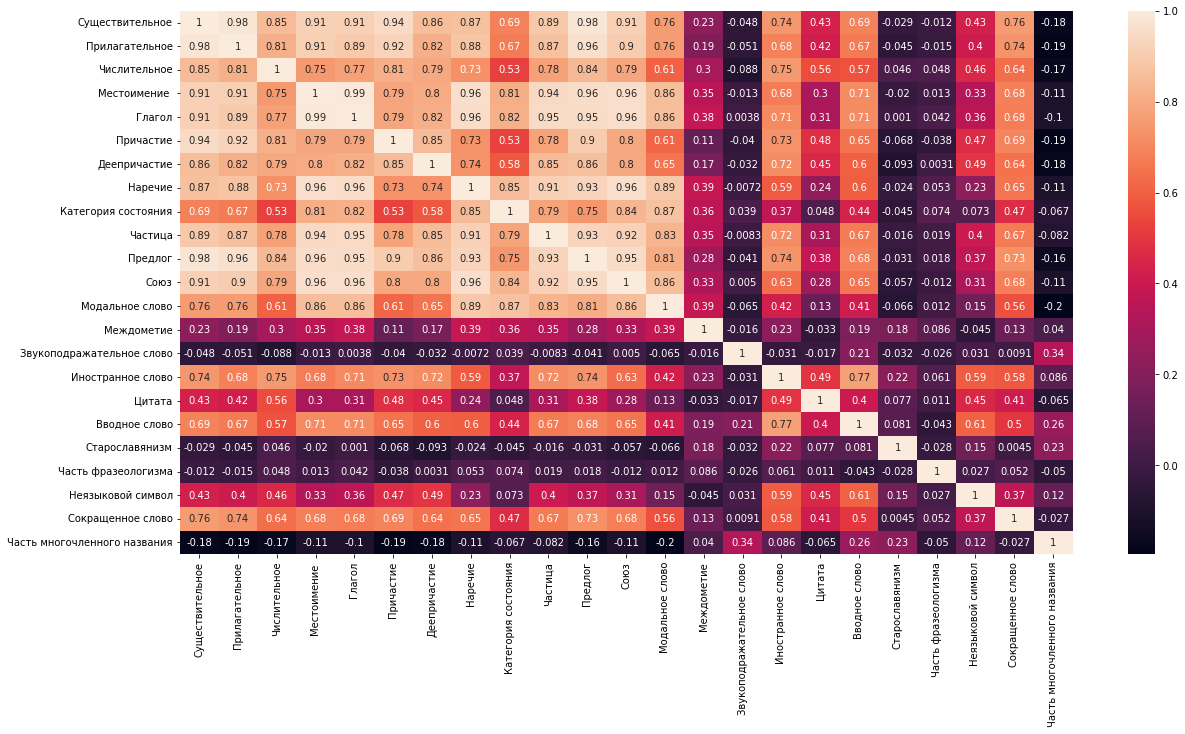

In [41]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c, annot=True);

#### Выбор количества факторов

Для выбора количества факторов можно использовать критерий Кайзера и scree график. Оба основаны на собственных значениях.

In [42]:
# Создание и выполнение факторного анализа 
fa = FactorAnalyzer()
#собственные значения и собственные векторы
fa.fit(df)
# Проверка собственных значений
ev, v = fa.get_eigenvalues()
ev

array([1.31257622e+01, 2.13638798e+00, 1.62735272e+00, 1.21475951e+00,
       1.01361392e+00, 6.93190932e-01, 6.37727035e-01, 5.40183466e-01,
       4.35936032e-01, 3.92996458e-01, 2.94540972e-01, 2.25751281e-01,
       1.72732323e-01, 1.33174031e-01, 1.16861168e-01, 7.12500495e-02,
       5.87343390e-02, 3.26221674e-02, 2.57573580e-02, 2.44598617e-02,
       1.34338954e-02, 9.14533346e-03, 3.62700476e-03])

Для 5-факторов, собственные значения больше единицы. Это означает, что необходимо выбрать всего 5 факторов.

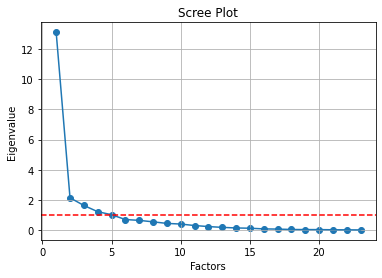

In [43]:
# Создание scree диаграммы
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Метод scree диаграммы рисует прямую линию для каждого фактора и его собственных значений. Число собственных значений больше единицы считается числом факторов. Красная линия ограничивает собственное значение, равное 1.

Здесь это видно только для 5-факторов, собственные значения которых больше единицы.

### Выполнение факторного анализа для 5


In [60]:
fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [61]:
factors = fa.loadings_

factor1 = [values[0] for values in factors]
factor2 = [values[1] for values in factors]
factor3 = [values[2] for values in factors]
factor4 = [values[3] for values in factors]
factor5 = [values[4] for values in factors]


results = {'Original column name': list(df.columns),
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
          'Factor5': factor5, 
          }
results = pd.DataFrame(results, columns = ['Original column name', 'Factor1', 'Factor2', 'Factor3', 
                                           'Factor4', 'Factor5'
                                          ])
results

,Original column name,Factor1,Factor2,Factor3,Factor4,Factor5
0,Cуществительное,0.827861,0.516583,-0.111620,-0.014174,-0.168171
1,Прилагательное,0.826494,0.474925,-0.109456,-0.050612,-0.204714
2,Числительное,0.634471,0.595133,-0.227847,0.149671,-0.018716
3,Местоимение,0.925515,0.321196,0.030309,0.009281,0.084390
4,Глагол,0.918866,0.345225,0.027934,0.035718,0.147215
5,Причастие,0.673830,0.617146,-0.130105,-0.111479,-0.223617
6,Деепричастие,0.676319,0.582282,-0.106655,-0.153730,0.056354
7,Наречие,0.961942,0.177706,-0.007493,0.062745,0.039630
8,Категория состояния,0.900680,-0.065708,0.065580,0.001537,0.137495
9,Частица,0.871489,0.386926,0.018354,0.005019,0.160488


In [62]:
# Получение дисперсии каждого фактора
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]
factor4 = [stat[3] for stat in stats]
factor5 = [stat[4] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
          'Factor5': factor5,
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'
                                                ])
statistics

,,Factor1,Factor2,Factor3,Factor4,Factor5
0,SS Loadings,10.397071,4.338239,1.106173,0.681927,0.391418
1,Proportion Var,0.452047,0.188619,0.048094,0.029649,0.017018
2,Cumulative Var,0.452047,0.640666,0.688760,0.718409,0.735427


5 факторов объясняют 73,52% дисперсии

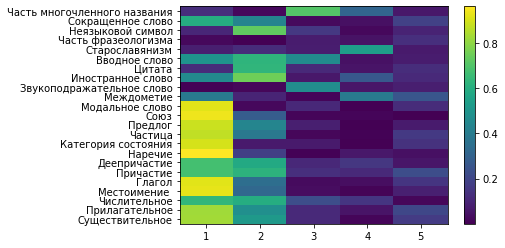

In [49]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для местоимения, глагола, наречия, категории состояния, частицы, предлога, союза, модального слова.
- Фактор 2 имеет высокие факторные нагрузки для иностранного слова, неязыкового символа.
- Фактор 3 имеет высокие факторные нагрузки для части многочленного названия.
- Фактор 4 имеет высокие факторные нагрузки для старославянзма.
- Фактор 5 имеет низкие факторные нагрузки. 

### Выполнение факторного анализа для 4


In [63]:
# Выполним факторный анализ используя 4 фактора
fa = FactorAnalyzer(n_factors = 4, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [64]:
factors_new = fa.loadings_

factor1_new = [values[0] for values in factors_new]
factor2_new = [values[1] for values in factors_new]
factor3_new = [values[2] for values in factors_new]
factor4_new = [values[3] for values in factors_new]

results_new = {'Original column name': list(df.columns),
        'Factor1': factor1_new, 
        'Factor2': factor2_new,
        'Factor3': factor3_new,
        'Factor4': factor4_new,
          }

results_new = pd.DataFrame(results_new, columns = ['Original column name', 'Factor1', 'Factor2', 'Factor3', 'Factor4'
                                                  ])
results_new

,Original column name,Factor1,Factor2,Factor3,Factor4
0,Cуществительное,0.812909,0.545734,-0.111178,-0.058168
1,Прилагательное,0.812104,0.505479,-0.113418,-0.105568
2,Числительное,0.612260,0.623686,-0.209635,0.158732
3,Местоимение,0.925692,0.320045,0.025343,0.077959
4,Глагол,0.919274,0.338565,0.026226,0.130061
5,Причастие,0.664354,0.641458,-0.133855,-0.176655
6,Деепричастие,0.684438,0.565418,-0.115189,-0.080070
7,Наречие,0.954574,0.190979,-0.013484,0.112181
8,Категория состояния,0.905920,-0.072051,0.047966,0.100282
9,Частица,0.874068,0.374921,0.014325,0.107321


In [65]:
# Получение дисперсии каждого фактора
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]
factor4 = [stat[3] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
        'Factor1': factor1, 
        'Factor2': factor2, 
        'Factor3': factor3, 
        'Factor4': factor4,
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2', 'Factor3', 'Factor4'])
statistics

,,Factor1,Factor2,Factor3,Factor4
0,SS Loadings,10.267226,4.447056,1.131570,0.746270
1,Proportion Var,0.446401,0.193350,0.049199,0.032447
2,Cumulative Var,0.446401,0.639751,0.688950,0.721397


4 фактора объясняют 72,12% дисперсии

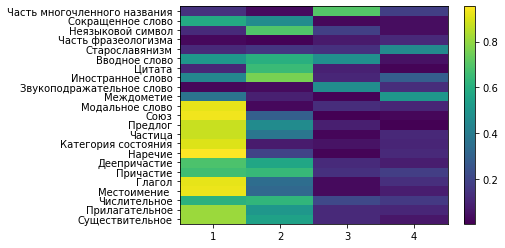

In [66]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,5))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для глагола, местоимения, наречия, категории состояния, частица, предлога, союза, модального слова.
- Фактор 2 имеет высокие факторные нагрузки для иностранного слова, неязыкового символа.
- Фактор 3 имеет высокие факторные нагрузки для части многочленного названия.
- Фактор 4 имеет высокие факторные нагрузки для междометия.


Уберем доли дисперсии переменных с низким показателем

In [68]:
fa = FactorAnalyzer(n_factors = 4, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [69]:
communalities = pd.DataFrame(fa.get_communalities(), index=df.columns)
communalities[communalities[0]<0.3]

,0
Звукоподражательное слово,0.232874
Старославянизм,0.259192
Часть фразеологизма,0.017796


In [70]:
# Уберем с низким показателем
df.drop(columns=['Часть фразеологизма','Звукоподражательное слово','Старославянизм'], inplace=True)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

df_scaled = scaler.fit_transform(df)

In [72]:
fa = FactorAnalyzer(n_factors=4)
fa.fit(df_scaled)

pd.DataFrame(fa.loadings_,index=df.columns)

,0,1,2,3
Cуществительное,0.733265,0.337951,-0.109247,-0.099887
Прилагательное,0.802171,0.245022,-0.113392,-0.173997
Числительное,0.128879,0.812983,-0.246078,0.318135
Местоимение,0.953590,0.039361,0.069616,0.031106
Глагол,0.888502,0.107881,0.067064,0.102635
Причастие,0.535646,0.487401,-0.155329,-0.190619
Деепричастие,0.495910,0.476532,-0.118951,-0.022104
Наречие,1.004278,-0.086012,0.004997,0.091939
Категория состояния,1.103366,-0.415046,0.052906,0.078200
Частица,0.802935,0.181939,0.048454,0.105498


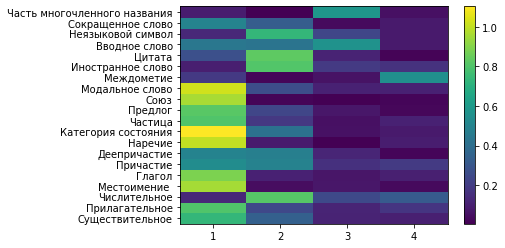

In [73]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,5))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для глагола, местоимения, наречия, категории состояния, союза, модального слова.
- Фактор 2 имеет высокие факторные нагрузки для числительного, цитаты, иностранного слова, неязыкового символа.
- Фактор 3 имеет высокие факторные нагрузки для части многочленного названия, вводного слова.
- Фактор 4 имеет высокие факторные нагрузки для междометия.


In [74]:
pd.DataFrame(fa.get_factor_variance(), index=['SS Loadings','Proportion Var','Cum Var'])

,0,1,2,3
SS Loadings,9.528860,3.811341,0.924425,0.574714
Proportion Var,0.476443,0.190567,0.046221,0.028736
Cum Var,0.476443,0.667010,0.713231,0.741967


4 фактора объясняют 74,18% дисперсии

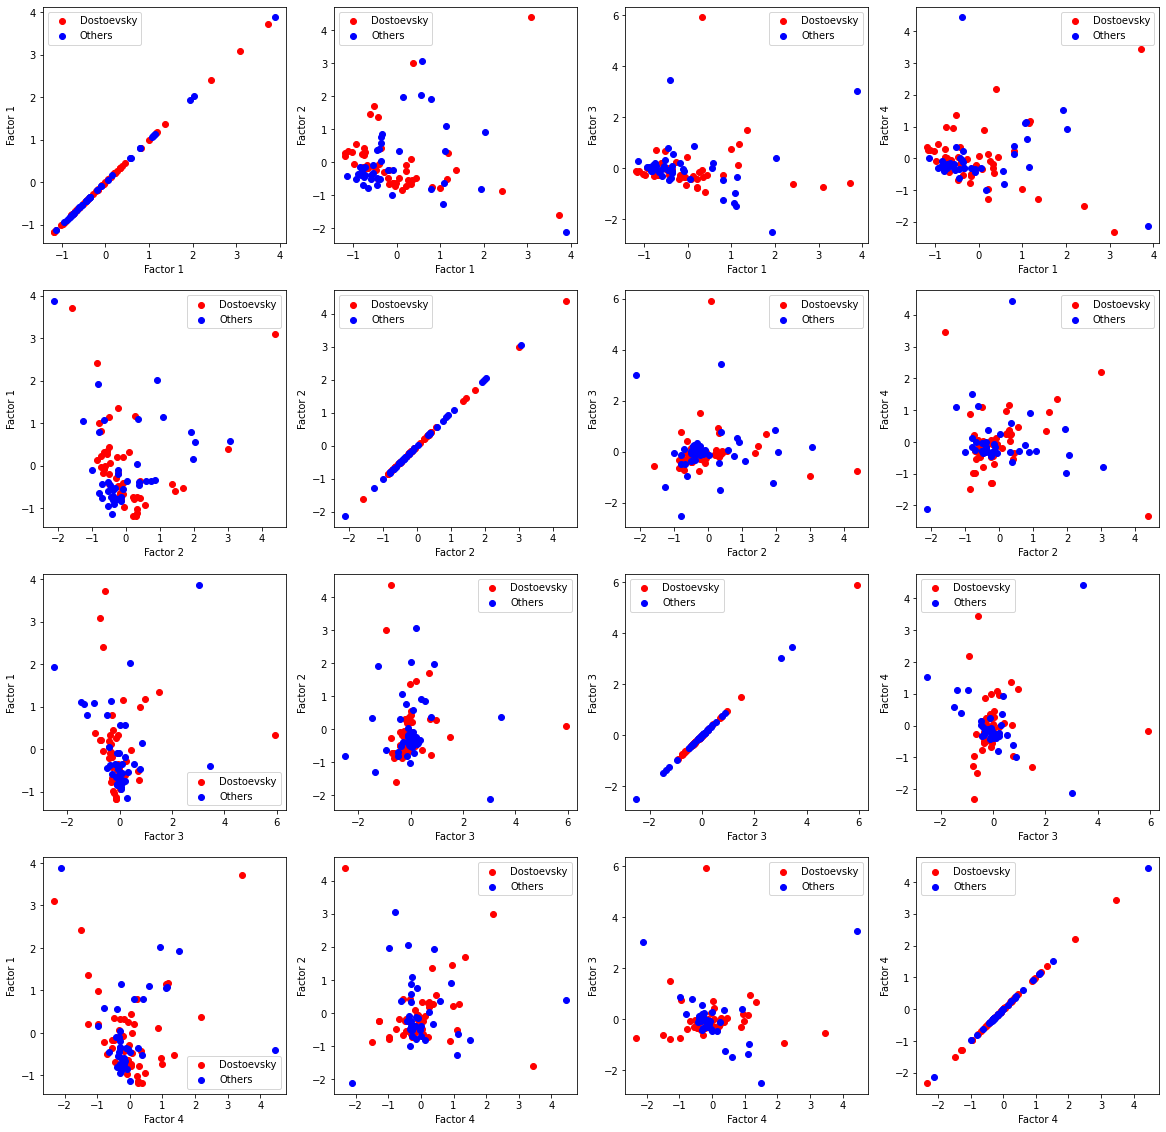

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Разбиваем таблицу на две части
data1 = df.head(50)
data2 = df.tail(df.shape[0] - 50)

# Производим факторный анализ
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

fa = FactorAnalysis(n_components=4)
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

fa.fit(data2_scaled)
data2_factors = fa.transform(data2_scaled)


#И наконец, построим точечную диаграмму для всех возможных комбинаций факторов:

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        axs[i, j].scatter(data1_factors[:, i], data1_factors[:, j], c='r', label='Dostoevsky')
        axs[i, j].scatter(data2_factors[:, i], data2_factors[:, j], c='b', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()

plt.show()



### Выполнение SVM

Kernel: linear
Accuracy: 0.875
Factors 1 and 2, Accuracy: 0.58
Points reflected from dataset 0: [1, 2, 8, 10, 15, 16, 17, 18, 19, 21]
Points reflected from dataset 1: [3, 5, 6, 9]
Factors 1 and 3, Accuracy: 0.67
Points reflected from dataset 0: [1, 2, 8, 10, 12, 15, 16, 17, 19, 21]
Points reflected from dataset 1: [3, 4, 5, 6, 7, 9]
Factors 1 and 4, Accuracy: 0.88
Points reflected from dataset 1: [0, 3, 4, 5, 6, 7, 9, 11, 13, 14, 22]
Points reflected from dataset 0: [1, 2, 8, 10, 12, 15, 16, 17, 18, 21]
Factors 2 and 3, Accuracy: 0.71
Points reflected from dataset 0: [1, 2, 8, 10, 12, 15, 16, 17, 18, 19, 21]
Points reflected from dataset 1: [3, 4, 5, 6, 7, 9]
Factors 2 and 4, Accuracy: 0.75
Points reflected from dataset 1: [0, 3, 4, 5, 6, 7, 9, 11, 14, 22, 23]
Points reflected from dataset 0: [1, 2, 8, 10, 15, 18, 21]
Factors 3 and 4, Accuracy: 0.54
Points reflected from dataset 1: [0, 4, 6, 7, 11, 13, 14, 20, 22, 23]
Points reflected from dataset 0: [2, 12, 18]


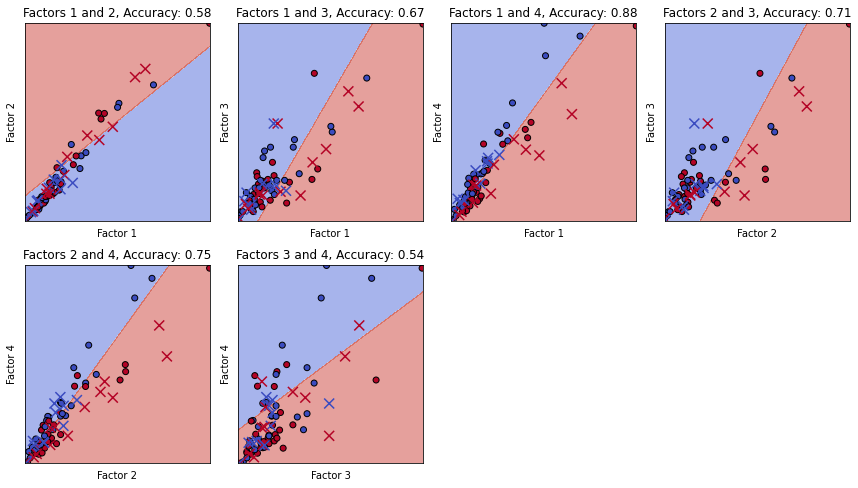

Выбранные строки из датасета 1:
     Factor1  Factor2  Factor3  Factor4
32       NaN      NaN      NaN      NaN
35       NaN      NaN      NaN      NaN
44       NaN      NaN      NaN      NaN
46       NaN      NaN      NaN      NaN
76       NaN      NaN      NaN      NaN
86       NaN      NaN      NaN      NaN
96       NaN      NaN      NaN      NaN
97       NaN      NaN      NaN      NaN
99       NaN      NaN      NaN      NaN
130      NaN      NaN      NaN      NaN
Выбранные строки из датасета 2:
     Factor1  Factor2  Factor3  Factor4
24       NaN      NaN      NaN      NaN
39       NaN      NaN      NaN      NaN
89       NaN      NaN      NaN      NaN
85       NaN      NaN      NaN      NaN
90       NaN      NaN      NaN      NaN
116      NaN      NaN      NaN      NaN
125      NaN      NaN      NaN      NaN
151      NaN      NaN      NaN      NaN
177      NaN      NaN      NaN      NaN
180      NaN      NaN      NaN      NaN
247      NaN      NaN      NaN      NaN


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)#test_size=0.33, random_state=42



print(f'Kernel: linear')
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


def print_reflected_indices(X_test, y_test, y_pred):
    reflected_indices = {}
    for idx, (test_point, pred_label) in enumerate(zip(X_test, y_pred)):
        true_label = y_test[idx]
        if pred_label == true_label:
            if true_label not in reflected_indices:
                reflected_indices[true_label] = [idx]
            else:
                reflected_indices[true_label].append(idx)
    for label, indices in reflected_indices.items():
        print(f'Points reflected from dataset {label}: {indices}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    print_reflected_indices(X_test[:, pair], y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

# Вывод определенных строк из датасета
def print_selected_rows(dataset, indices):
    selected_rows = dataset.iloc[indices]
    print(selected_rows)

print("Выбранные строки из датасета 1:")
print_selected_rows(df1, [1, 2, 8, 10, 12, 15, 16, 17, 18, 21])

print("Выбранные строки из датасета 2:")
print_selected_rows(df2,  [0, 3, 4, 5, 6, 7, 9, 11, 13, 14, 22])

